In [30]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import spacy
import string
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from wordcloud import WordCloud 

In [31]:
nlp = spacy.load("en_core_web_sm")
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'image','edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'rather', 'lot', 'make', 'want', 'seem', 'run', 'need', 'even', 'even', 'also', 'may', 'take', 'come'])
stop_words.extend(["patients", "floor", "icu","alive","discharged", "er", 'two','three'])

en_stopwords = set(stop_words)

In [32]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/swagyangjh/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [44]:
survey = pd.read_csv("/Users/swagyangjh/Desktop/Survey_Results_Merged.csv")

In [45]:
#function to clean and lemmatize comments
def clean_comments(text):
    #remove punctuations
    regex = re.compile('[' + re.escape(string.punctuation) + '\\r\\t\\n]')
    nopunct = regex.sub(" ", str(text))
    #use spacy to lemmatize comments
    doc = nlp(nopunct, disable=['parser','ner'])
    lemma = [token.lemma_ for token in doc]
    return lemma

In [55]:
def rightTypes(ngram):
    if '-pron-' in ngram or '' in ngram or ' 'in ngram or 't' in ngram:
        return False
    for word in ngram:
        if word in en_stopwords:
            return False
    acceptable_types = ('JJ', 'JJR', 'JJS')
    second_type = ('NN', 'NNS', 'NNP', 'NNPS')
    tags = nltk.pos_tag(ngram)
    if tags[0][1] in acceptable_types and tags[1][1] in second_type:
        return True
    else:
        return False

In [56]:
def QA(datasetnum,method_justification):

    # Dataset
    dataset = survey.loc[survey['Dataset']==datasetnum]

    # Jusitification
    justification = dataset[method_justification]
    justification
    clean_justification = justification.dropna(axis=0,how='all')  
    clean_justification = clean_justification[1:]
    

    # Stopwords
   

    lemmatized = clean_justification.map(clean_comments)
    lemmatized = lemmatized.map(lambda x: [word.lower() for word in x])
    unlist_comments = [item for items in lemmatized for item in items]
    
    
    bigrams = nltk.collocations.BigramAssocMeasures()
    bigramFinder = nltk.collocations.BigramCollocationFinder.from_words(unlist_comments)
    bigram_freq = bigramFinder.ngram_fd.items()
    bigramFreqTable = pd.DataFrame(list(bigram_freq), columns=['bigram','freq']).sort_values(by='freq', ascending=False)
    bigramFreqTable.head().reset_index(drop=True)
    
    
    filtered_bi = bigramFreqTable[bigramFreqTable.bigram.map(lambda x: rightTypes(x))]
    
    # VIS Part
    topic_words = dict(filtered_bi)

    wc = str(topic_words['bigram'][:])
    
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

    wordcloudimage = WordCloud( max_words=500,
                                font_step=3 ,
                                max_font_size=500,
                                stopwords=stop_words,
                                background_color='white',
                               colormap='tab10',
                                width=1000,
                                height=720,
                               prefer_horizontal=10.0
                              ).generate(wc)

    plt.figure(figsize=(20,8))
    plt.imshow(wordcloudimage)
    plt.axis("off")
    plt.show()
    
    
    return print(filtered_bi)
    



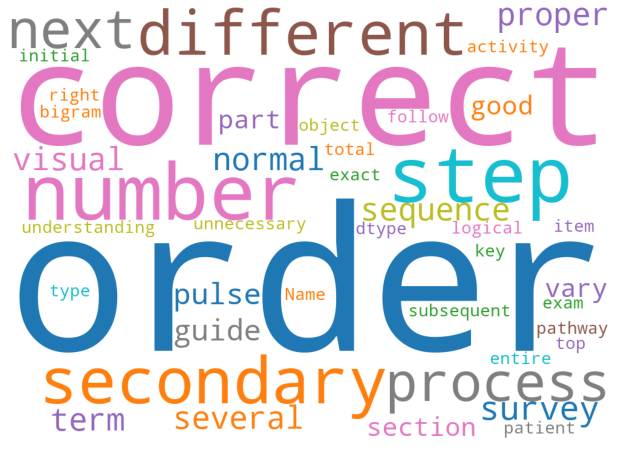

                    bigram  freq
182    (secondary, survey)     8
47         (proper, order)     2
320       (correct, order)     2
185     (normal, sequence)     2
443        (several, term)     1
436        (visual, guide)     1
468       (pulse, section)     1
402   (different, process)     1
396           (vary, part)     1
545     (correct, process)     1
574  (good, understanding)     1
597      (different, step)     1
606    (unnecessary, step)     1
585     (correct, pathway)     1
486         (exact, order)     1
525        (key, activity)     1
143          (top, number)     1
162           (next, item)     1
158   (subsequent, number)     1
32         (logical, step)     1
96       (secondary, exam)     1
308        (entire, order)     1
226        (follow, order)     1
220        (total, number)     1
215         (right, order)     1
242           (next, type)     1
237     (initial, patient)     1


In [57]:
dataset0 = QA('1','ss_Justification')